## Observations and Insights 

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on= "Mouse ID", how= "outer")

# Display the data table for preview
df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [12]:
# Checking the number of mice.
unique_mice = df["Mouse ID"].unique()
print(f'The number of mice in the study is {len(unique_mice)}.')


The number of mice in the study is 249.


In [13]:
grouped_df = df.groupby(['Mouse ID'])

grouped_df.count()


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


In [14]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df['Mouse ID'].value_counts()




g989    13
a644    10
p189    10
v923    10
t451    10
        ..
x226     1
b447     1
n482     1
x336     1
v199     1
Name: Mouse ID, Length: 249, dtype: int64

In [15]:
# Optional: Get all the data for the duplicate mouse ID. 
print(df.loc[(df["Mouse ID"]== "g989")])

# We can see Mouse ID g989 has duplicate data points for the same Timepoint

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [16]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Create a list that includes the rows that have duplicate data and attach variable to this list.
duplicate_data = df[(df["Mouse ID"] == "g989")].index

# Drop rows of duplicate data
df_clean = df.drop(duplicate_data)

#Check to see that Mouse ID with 13 data points has been dropped
df_clean['Mouse ID'].value_counts()

d251    10
j296    10
v923    10
t451    10
e476    10
        ..
n482     1
h428     1
x336     1
f932     1
l872     1
Name: Mouse ID, Length: 248, dtype: int64

In [36]:
df_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [17]:
# Checking the number of mice in the clean DataFrame.
unique_mice_clean = df_clean["Mouse ID"].unique()
print(f'The number of mice in the study is {len(unique_mice_clean)}.')

The number of mice in the study is 248.


## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
grouped_drug_df = df_clean.groupby(["Drug Regimen"])
drug_tumour_mean = grouped_drug_df["Tumour Volume (mm3)"].mean()
drug_tumour_median = grouped_drug_df["Tumour Volume (mm3)"].median()
drug_tumour_var = grouped_drug_df["Tumour Volume (mm3)"].var()
drug_tumour_stdev = grouped_drug_df["Tumour Volume (mm3)"].std()
drug_tumour_sem = grouped_drug_df["Tumour Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
summary_stat_df = [drug_tumour_mean, drug_tumour_median, drug_tumour_var, drug_tumour_stdev, drug_tumour_sem]
merged_summary_stat_df = pd.concat(summary_stat_df, join="outer", axis=1)

# Rename columns of df.
merged_summary_stat_df.columns.values[0] = "Mean Tumour Vol"
merged_summary_stat_df.columns.values[1] = "Median Tumour Vol"
merged_summary_stat_df.columns.values[2] = "Variance Tumour Vol"
merged_summary_stat_df.columns.values[3] = "Std Dev Tumour Vol"
merged_summary_stat_df.columns.values[4] = "SEM Tumour Vol"

# Print df.
print(f'Summary Statistics Table for the Tumour Volume (mm3) of each Drug Regimen:')
merged_summary_stat_df

Summary Statistics Table for the Tumour Volume (mm3) of each Drug Regimen:


,Mean Tumour Vol,Median Tumour Vol,Variance Tumour Vol,Std Dev Tumour Vol,SEM Tumour Vol
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
tumour_vol = df_clean[{
    'Drug Regimen': 'Tumour Volume (mm3)',
    }]
tumour_vol

,Drug Regimen
0,Ramicane
1,Ramicane
2,Ramicane
3,Ramicane
4,Ramicane
...,...
1888,Naftisol
1889,Naftisol
1890,Naftisol
1891,Naftisol


## Bar and Pie Charts

Text(0, 0.5, 'No. of Mice Tested')

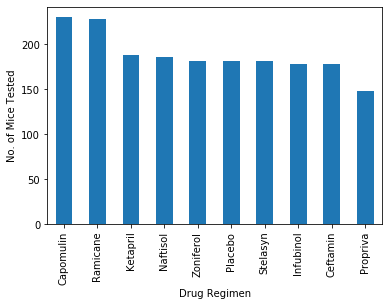

In [127]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_and_time = df_clean["Drug Regimen"].value_counts()
fig_1 = drug_and_time.plot(kind= 'bar')
fig_1.set_xlabel("Drug Regimen")
fig_1.set_ylabel("No. of Mice Tested")



In [23]:
df_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

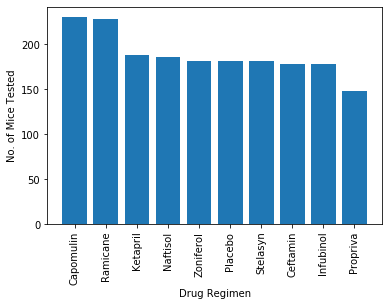

In [84]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_and_time_df = df_clean[["Drug Regimen", "Timepoint"]]
drug_and_time_df = drug_and_time_df.groupby(["Drug Regimen"])
drug_and_time_df = drug_and_time_df.count()
drug_and_time_df = drug_and_time_df.sort_values("Timepoint", ascending=False)


# Generate bar chart
plt.bar(drug_and_time_df.index, drug_and_time_df["Timepoint"])
plt.xlabel("Drug Regimen")
plt.ylabel("No. of Mice Tested")
plt.xticks(rotation=90)




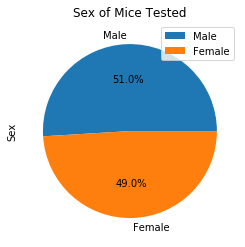

In [123]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_female_df = pd.DataFrame(df_clean["Sex"].value_counts())
sexes = ["Male", "Female"]

male_female_df.plot(kind='pie', y='Sex', autopct='%1.1f%%', title= "Sex of Mice Tested")


Text(0.5, 1.0, 'Sex of mice Tested')

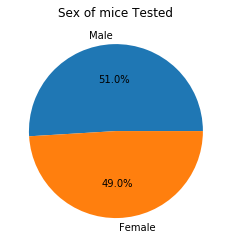

In [116]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_female_df = pd.DataFrame(df_clean["Sex"].value_counts())
sexes = ["Male", "Female"]

plt.pie(male_female_df["Sex"], labels=male_female_df.index, autopct="%1.1f%%")
plt.title("Sex of Mice Tested")



## Quartiles, Outliers and Boxplots

In [101]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumour volume at the last timepoint


In [102]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumour vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumour volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [103]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [104]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin


In [105]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [106]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
